In [ ]:
#Wu Zijing, 3035556644, STAT3612 Homework 1

In [1]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/Users/zijingohmeywu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading data
heloc = pd.read_csv('/Users/zijingohmeywu/Desktop/STAT3612/Assignment_1/HelocData.csv')
variable_names = pd.read_excel('/Users/zijingohmeywu/Desktop/STAT3612/Assignment_1/HelocDataDict.xlsx')

In [3]:
#Show HelocDataDict.xlsx
variable_names

,Variable Names,Description
0,RiskFlag,Paid as negotiated flag (12-36 Months). String...
1,x1,Consolidated version of risk markers
2,x2,Months Since Oldest Trade Open
3,x3,Months Since Most Recent Trade Open
4,x4,Average Months in File
5,x5,Number Satisfactory Trades
6,x6,Number Trades 60+ Ever
7,x7,Number Trades 90+ Ever
8,x8,Percent Trades Never Delinquent
9,x9,Months Since Most Recent Delinquency


In [4]:
#Show HelocData.csv
heloc.head()

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,Bad,75,169,2,59,21,0,0,100,-7,...,36,-7,4,4,43,112,4,6,0,83
1,Bad,66,502,4,145,34,0,0,97,36,...,27,4,3,3,80,53,17,3,12,83
2,Good,69,338,2,62,22,0,0,96,12,...,35,0,4,4,25,100,3,2,1,45
3,Good,75,422,1,91,55,0,0,100,-7,...,33,0,4,4,2,11,12,2,1,57
4,Bad,63,242,2,68,25,0,0,100,-7,...,19,-7,3,3,73,-8,12,1,5,87


In [5]:
#This function takes all the entries contained integer type code and counts the number of occurances
def count_missing_values(feature, code):
    return ((heloc[feature]) == code).sum()

#Create feature titles by concatenating str type x and integers from 1 - 23
feature_titles = []

for i in range(1, 24):
    feature_titles.append("x"+str(i))

#Run the function to count missing values and append them to a column that stores how many missing values each feature contains
mv_col = []
for t in feature_titles:
    mv_col.append(count_missing_values(t, -7)+count_missing_values(t, -8)+count_missing_values(t, -9))
    

#Create dataframe containing the cumulative missing values for each feature and title each column as the feature titles
df_mv_freq = pd.DataFrame(data=np.array([mv_col]), columns = feature_titles).T

In [6]:
df_mv_freq

,0
x1,598
x2,827
x3,588
x4,588
x5,588
x6,588
x7,588
x8,588
x9,5428
x10,588


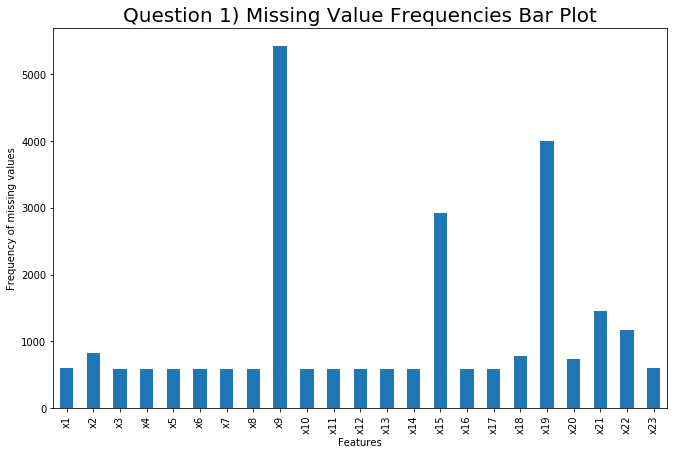

In [7]:
#Plotting the bar chart
X = df_mv_freq
X.plot.bar(figsize = (11, 7), legend = None)
plt.xlabel("Features")
plt.ylabel("Frequency of missing values")
plt.title('Question 1) Missing Value Frequencies Bar Plot', fontsize=20)
plt.show()

In [8]:
np.random.seed = 3035556644
train, test = train_test_split(heloc, test_size=0.2)

In [9]:
train

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
6268,Bad,66,81,4,35,10,0,0,100,-7,...,60,0,1,1,79,94,4,2,2,100
5126,Bad,78,260,13,133,23,0,0,100,-7,...,35,0,1,1,37,76,7,2,1,82
1468,Good,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1000,Good,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3301,Good,92,288,7,102,16,0,0,100,-7,...,6,-8,1,0,1,-8,2,-8,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,Good,85,242,19,103,15,0,0,100,-7,...,19,-8,0,0,18,-8,6,1,0,70
1031,Bad,83,113,25,62,15,0,0,100,-7,...,40,0,0,0,35,52,3,3,0,60
111,Good,64,281,13,91,54,3,3,93,7,...,32,4,2,2,35,72,4,3,2,41
6567,Bad,85,136,10,57,7,0,0,100,-7,...,14,3,1,1,1,72,2,1,0,50


In [10]:
col_mean = train.mean()
col_mean

x1      67.425123
x2     184.270945
x3       8.604996
x4      73.896976
x5      19.443170
x6       0.041592
x7      -0.146528
x8      86.586949
x9       6.543684
x10      4.920043
x11      5.509024
x12     20.887893
x13      1.242500
x14     32.046492
x15     -0.301661
x16      0.869726
x17      0.810924
x18     31.498387
x19     38.792877
x20      3.196008
x21      0.956376
x22      0.016135
x23     61.880841
dtype: float64

In [11]:
feature_mean = {}
for feature in feature_titles:
    sum = 0
    count = 0
    for entry in train[feature]:
        if (entry == -9) or (entry == -8) or (entry == -7):
            pass;
        else:
            sum += entry
            count += 1
    feature_mean[feature] = [sum, count]

In [12]:
feature_mean

{'x1': [568448, 7889],
 'x2': [1547618, 7698],
 'x3': [76237, 7896],
 'x4': [622535, 7896],
 'x5': [166920, 7896],
 'x6': [4587, 7896],
 'x7': [3013, 7896],
 'x8': [728712, 7896],
 'x9': [86273, 4019],
 'x10': [45405, 7896],
 'x11': [50333, 7896],
 'x12': [179008, 7896],
 'x13': [14635, 7896],
 'x14': [272372, 7896],
 'x15': [15093, 6039],
 'x16': [11516, 7896],
 'x17': [11024, 7896],
 'x18': [268914, 7755],
 'x19': [350899, 5136],
 'x20': [31884, 7783],
 'x21': [17865, 7193],
 'x22': [8126, 7427],
 'x23': [522108, 7882]}

In [13]:
df_feature_mean = pd.DataFrame.from_dict(feature_mean).transpose()
df_feature_mean.columns = ["sum", "entries"]
df_feature_mean["average"] = df_feature_mean['sum']/df_feature_mean["entries"]

In [14]:
df_feature_mean

,sum,entries,average
x1,568448,7889,72.055774
x2,1547618,7698,201.041569
x3,76237,7896,9.655142
x4,622535,7896,78.841819
x5,166920,7896,21.139818
x6,4587,7896,0.580927
x7,3013,7896,0.381586
x8,728712,7896,92.288754
x9,86273,4019,21.466285
x10,45405,7896,5.750380


In [15]:
for feature in feature_titles:
    train[feature] = train[feature].replace([-7, -8, -9],df_feature_mean['average'][feature])

/Users/zijingohmeywu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zijingohmeywu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zijingohmeywu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [16]:
print("Question 2)")
train

Question 2)


,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
6268,Bad,66.000000,81.000000,4.000000,35.000000,10.000000,0.000000,0.000000,100.000000,21.466285,...,60.000000,0.000000,1.00000,1.00000,79.000000,94.000000,4.000000,2.000000,2.000000,100.000000
5126,Bad,78.000000,260.000000,13.000000,133.000000,23.000000,0.000000,0.000000,100.000000,21.466285,...,35.000000,0.000000,1.00000,1.00000,37.000000,76.000000,7.000000,2.000000,1.000000,82.000000
1468,Good,72.055774,201.041569,9.655142,78.841819,21.139818,0.580927,0.381586,92.288754,21.466285,...,34.494934,2.499255,1.45846,1.39615,34.676209,68.321456,4.096621,2.483665,1.094116,66.240548
1000,Good,72.055774,201.041569,9.655142,78.841819,21.139818,0.580927,0.381586,92.288754,21.466285,...,34.494934,2.499255,1.45846,1.39615,34.676209,68.321456,4.096621,2.483665,1.094116,66.240548
3301,Good,92.000000,288.000000,7.000000,102.000000,16.000000,0.000000,0.000000,100.000000,21.466285,...,6.000000,2.499255,1.00000,0.00000,1.000000,68.321456,2.000000,2.483665,0.000000,29.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,Good,85.000000,242.000000,19.000000,103.000000,15.000000,0.000000,0.000000,100.000000,21.466285,...,19.000000,2.499255,0.00000,0.00000,18.000000,68.321456,6.000000,1.000000,0.000000,70.000000
1031,Bad,83.000000,113.000000,25.000000,62.000000,15.000000,0.000000,0.000000,100.000000,21.466285,...,40.000000,0.000000,0.00000,0.00000,35.000000,52.000000,3.000000,3.000000,0.000000,60.000000
111,Good,64.000000,281.000000,13.000000,91.000000,54.000000,3.000000,3.000000,93.000000,7.000000,...,32.000000,4.000000,2.00000,2.00000,35.000000,72.000000,4.000000,3.000000,2.000000,41.000000
6567,Bad,85.000000,136.000000,10.000000,57.000000,7.000000,0.000000,0.000000,100.000000,21.466285,...,14.000000,3.000000,1.00000,1.00000,1.000000,72.000000,2.000000,1.000000,0.000000,50.000000


Question 3)


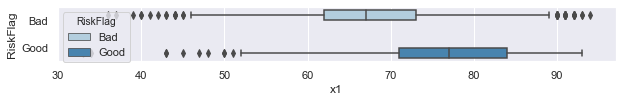

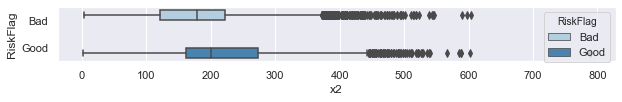

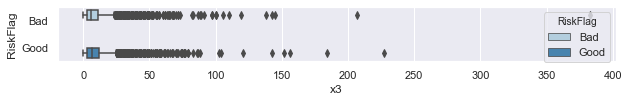

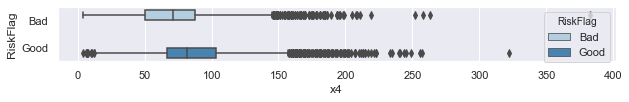

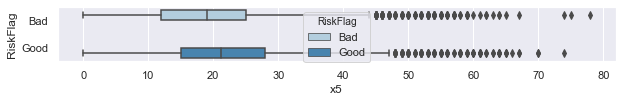

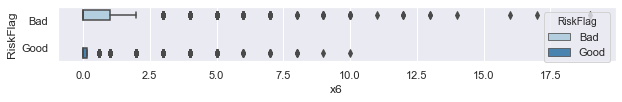

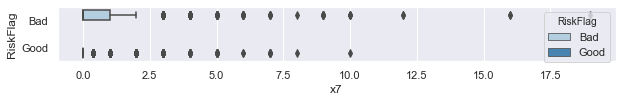

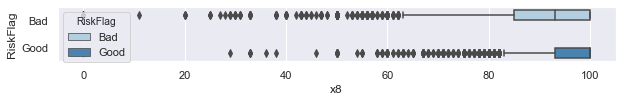

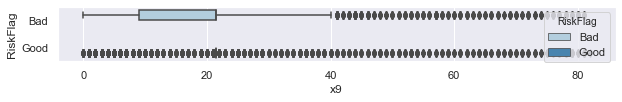

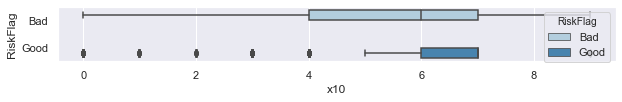

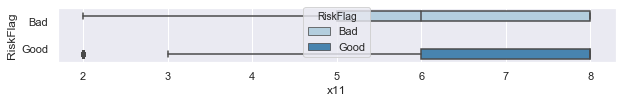

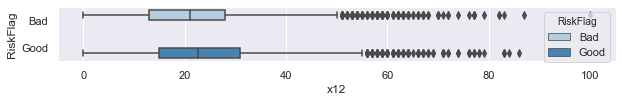

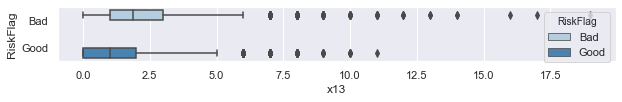

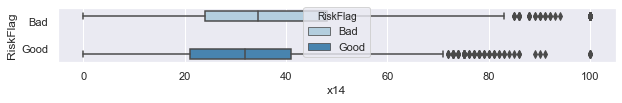

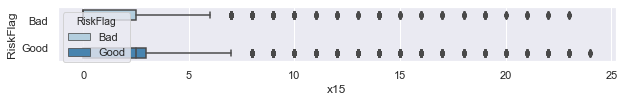

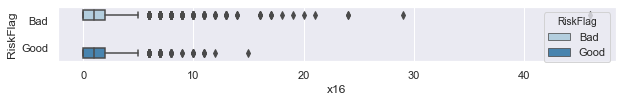

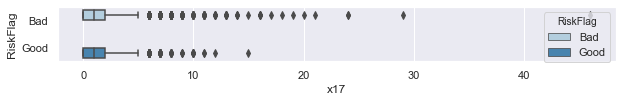

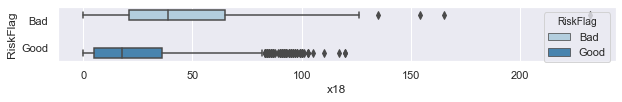

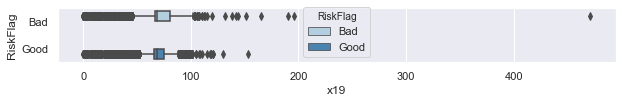

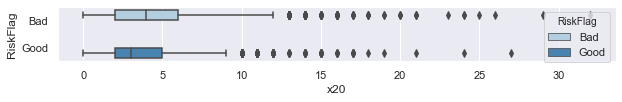

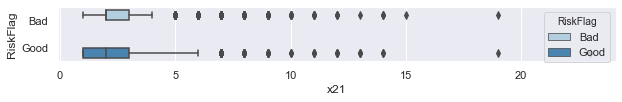

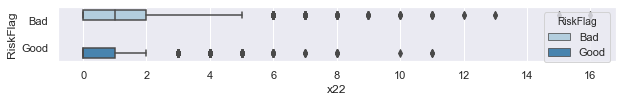

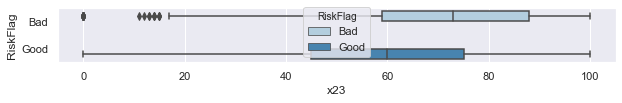

In [17]:
print("Question 3)")
for title in feature_titles:
    sns.set(rc={'figure.figsize':(10,1)})
    sns.boxplot(x = title, y = "RiskFlag", data = train, hue = "RiskFlag", palette = "Blues")
    plt.show()

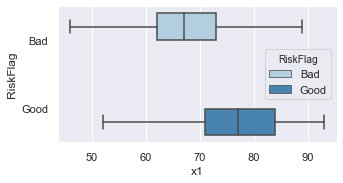

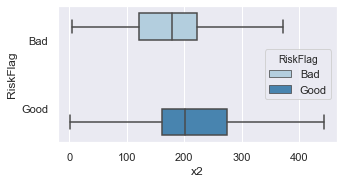

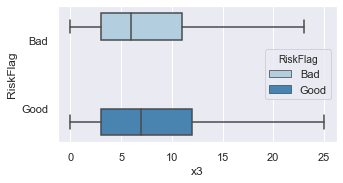

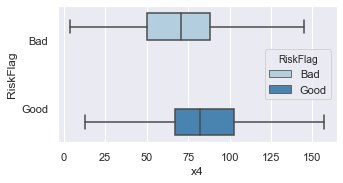

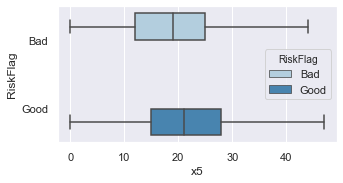

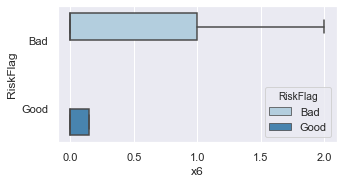

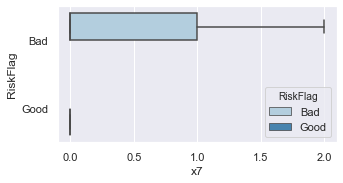

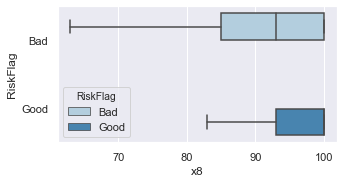

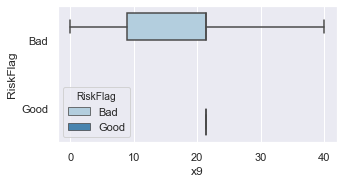

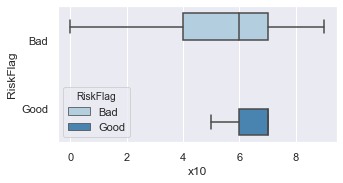

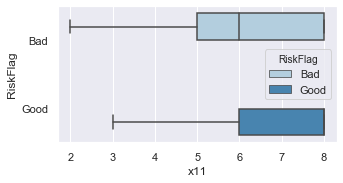

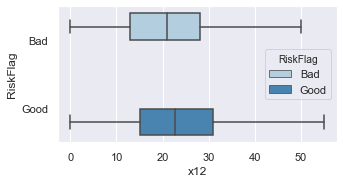

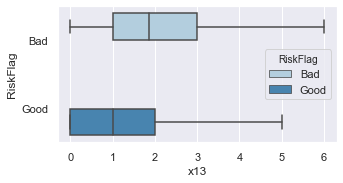

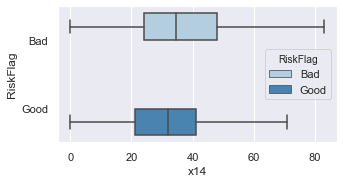

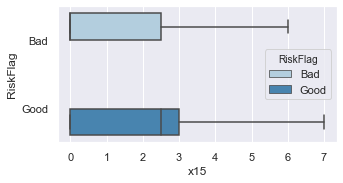

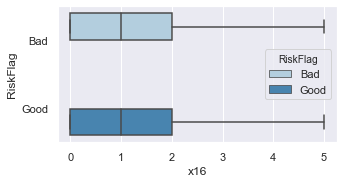

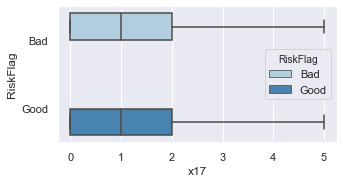

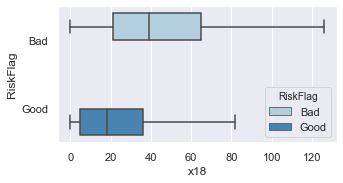

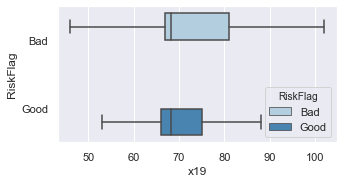

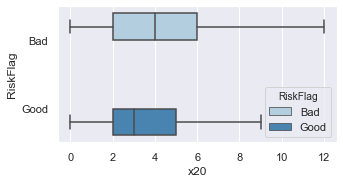

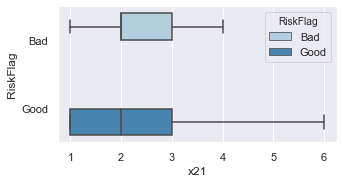

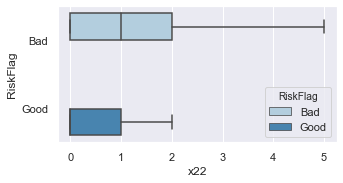

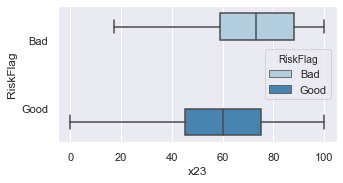

In [18]:
#Without outliers
for title in feature_titles:
    sns.set(rc={'figure.figsize':(5,2.5)})
    sns.boxplot(x = title, y = "RiskFlag", data = train, hue = "RiskFlag", palette = "Blues", showfliers = False)
    plt.show()

In [19]:
print("Question 4)")
print("The top 5 features should have the largest difference between the box plots of different RiskFlags. Since x9, x15, x19 have too many missing values, it is not reliable enough so they will not be considered for the top features. Any features that contained too many outliers neeed to be from consideration. Taking all of this into consideration, the top 5 features are x1, x10, x18, x22, x23")

Question 4)
The top 5 features should have the largest difference between the box plots of different RiskFlags. Since x9, x15, x19 have too many missing values, it is not reliable enough so they will not be considered for the top features. Any features that contained too many outliers neeed to be from consideration. Taking all of this into consideration, the top 5 features are x1, x10, x18, x22, x23


In [20]:
top_features = ["x1", "x10", "x18", "x22", "x23"]
top_train = train[top_features]

#Convert good/bad RiskFlag to binary 0, 1
risk_train = (train['RiskFlag'].values == 'Good').astype(np.int)

In [21]:
logistic = sm.Logit(risk_train, sm.add_constant(top_train))
logit_model = logistic.fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.577641
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8361
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Oct 2020   Pseudo R-squ.:                  0.1649
Time:                        01:36:38   Log-Likelihood:                -4833.1
converged:                       True   LL-Null:                       -5787.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2001      0.317    -19.543      0.000      -6.822      -5.578
x1             0.0927      0.005     20.314      0.000       0.084       0.102
x10            0.0146      0.021      0.704      0.481      -0.026       0.055
x18           -0.0060      0.001     -4.126      0.000      -0.009      -0.003
x22           -0.0053      0.023     -0.232      0.817      -0.050       0.039
x23           -0.0072      0.001     -4.952      0.000      -0.010      -0.004
==============================================================================
"""

In [22]:
wald = logit_model.pvalues.sort_values()
wald
print("Question 4)")
print("The rank of importance among the top features is the following: Consolidated version of risk markers > Percent Trades with Balance > Net Fraction Revolving Burden > Max Delq/Public Records Last 12 Months > Number Bank/Natl Trades w high utilization ratio")

Question 4)
The rank of importance among the top features is the following: Consolidated version of risk markers > Percent Trades with Balance > Net Fraction Revolving Burden > Max Delq/Public Records Last 12 Months > Number Bank/Natl Trades w high utilization ratio


In [23]:
print("Question 5)")
print("LLR p-value: ", logit_model.llr_pvalue)
print("The LLR p-value is equal to 0. This means we reject the null hypothesis so the logistic regression model is appropiate. Based on the coefficient values, x1 has the strongest effect and x22 has the weakest effect. The small error term of x18 and x23 indicate that the logistic model predicts the two features with the most accuracy. x18 and x23 have negative effects whereas x1, x10, x22 has positive effects.")

Question 5)
LLR p-value:  0.0
The LLR p-value is equal to 0. This means we reject the null hypothesis so the logistic regression model is appropiate. Based on the coefficient values, x1 has the strongest effect and x22 has the weakest effect. The small error term of x18 and x23 indicate that the logistic model predicts the two features with the most accuracy. x18 and x23 have negative effects whereas x1, x10, x22 has positive effects.


In [24]:
top_test = train[["RiskFlag"]+top_features]
#Convert good/bad RiskFlag to binary 0, 1
risk_test = (test['RiskFlag'].values == 'Good').astype(np.int)

In [25]:
risk = {"Good": 1, "Bad": 0}
top_test.RiskFlag = [risk[item] for item in top_test.RiskFlag]

/Users/zijingohmeywu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
top_test

,RiskFlag,x1,x10,x18,x22,x23
6268,0,66.000000,7.00000,79.000000,2.000000,100.000000
5126,0,78.000000,7.00000,37.000000,1.000000,82.000000
1468,1,72.055774,5.75038,34.676209,1.094116,66.240548
1000,1,72.055774,5.75038,34.676209,1.094116,66.240548
3301,1,92.000000,7.00000,1.000000,0.000000,29.000000
...,...,...,...,...,...,...
9552,1,85.000000,7.00000,18.000000,0.000000,70.000000
1031,0,83.000000,7.00000,35.000000,0.000000,60.000000
111,1,64.000000,4.00000,35.000000,2.000000,41.000000
6567,0,85.000000,7.00000,1.000000,0.000000,50.000000


In [27]:
prediction = logit_model.predict(top_test)
prediction

6268    0.993384
5126    0.998515
1468    0.467314
1000    0.467314
3301    0.901403
          ...   
9552    0.762309
1031    0.999216
111     0.325845
6567    0.999506
1570    0.347604
Length: 8367, dtype: float64

In [28]:
prediction_list = []
for p in prediction:
    if p > 0.5:
        prediction_list.append(1)
    else:
        prediction_list.append(0)

In [29]:
actual = list(top_test["RiskFlag"])

In [30]:
match = 0
for i in range(0, len(prediction_list)-1):
    check1 = prediction_list[i]
    check2 = actual[i]
    if check1 == check2:
        match += 1

In [31]:
total = len(prediction_list)
accuracy = match/total

In [33]:
print("Question 6)")
print("Accuracy is measured by the total number of matches over the total sample set. The accuracy is: ", accuracy, "The performance of this model is poor on the test set.")

Question 6)
Accuracy is measured by the total number of matches over the total sample set. The accuracy is:  0.3013027369427513 The performance of this model is poor on the test set.
